In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('summary.csv')

In [3]:
df

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

In [5]:
df.rename(
    columns={"3PointMade": "ThreePointMade", "3PointAttempt": "ThreePointAttempt", "3PointPercent": "ThreePointPercent"},
    inplace=True,
)

In [6]:
df.isnull().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
ThreePointMade        0
ThreePointAttempt     0
ThreePointPercent    11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

In [7]:
df['ThreePointPercent']=df['ThreePointPercent'].fillna(df['ThreePointPercent'].mean())

In [8]:
df.isnull().sum()

Name                 0
GamesPlayed          0
MinutesPlayed        0
PointsPerGame        0
FieldGoalsMade       0
FieldGoalsAttempt    0
FieldGoalPercent     0
ThreePointMade       0
ThreePointAttempt    0
ThreePointPercent    0
FreeThrowMade        0
FreeThrowAttempt     0
FreeThrowPercent     0
OffensiveRebounds    0
DefensiveRebounds    0
Rebounds             0
Assists              0
Steals               0
Blocks               0
Turnovers            0
Target               0
dtype: int64

In [9]:
df.describe()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,ThreePointMade,ThreePointAttempt,ThreePointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,15.956966,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [10]:
df.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,ThreePointMade,ThreePointAttempt,ThreePointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [11]:
df.sample()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,ThreePointMade,ThreePointAttempt,ThreePointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
132,Nick Anderson,81,22.0,11.5,4.6,9.3,49.4,0.0,0.2,5.9,2.3,3.3,70.5,1.3,2.6,3.9,1.5,0.8,0.4,1.7,1


In [12]:
df.Target.value_counts()

1    831
0    509
Name: Target, dtype: int64

# EDA

# Target

In [13]:
df.Target.value_counts()

1    831
0    509
Name: Target, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target')

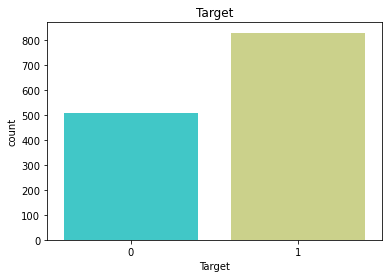

In [14]:
sns.countplot(df.Target,palette='rainbow')
plt.title('Target')

# 1 GamesPlayed

In [15]:
df.GamesPlayed.unique()

array([36, 35, 74, 58, 48, 75, 62, 65, 42, 40, 27, 45, 44, 49, 41, 82, 80,
       76, 61, 32, 52, 78, 51, 64, 55, 34, 77, 72, 69, 54, 24, 50, 56, 67,
       38, 37, 46, 19, 79, 81, 70, 33, 73, 47, 63, 15, 68, 39, 31, 25, 43,
       59, 66, 60, 71, 57, 21, 53, 29, 23, 28, 12, 11, 30, 22, 26, 18, 20,
       14, 16], dtype=int64)

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GamesPlayed')

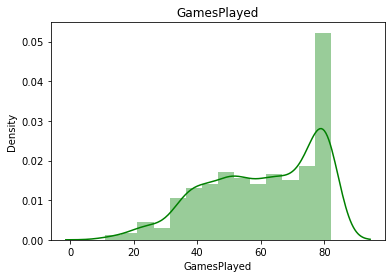

In [16]:
sns.distplot(df['GamesPlayed'],color='g')
plt.title('GamesPlayed')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GamesPlayed')

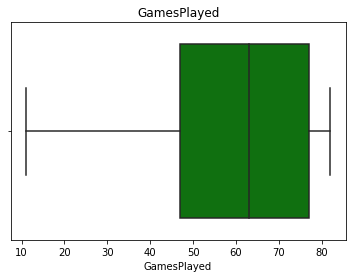

In [17]:
sns.boxplot(df['GamesPlayed'],color='g')
plt.title('GamesPlayed')

In [18]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [19]:
annova=ols('GamesPlayed ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df        sum_sq      mean_sq          F  PR(>F)
Target       1.0   64089.89899  64089.89899  250.08597     0.0
Residual  1338.0  342891.23161    256.27147        NaN     NaN


# 2 MinutesPlayed

In [20]:
df.MinutesPlayed.value_counts()

14.8    13
8.5     13
19.8    12
15.1    12
10.6    12
        ..
18.1     1
39.5     1
36.5     1
31.5     1
28.4     1
Name: MinutesPlayed, Length: 325, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MinutesPlayed')

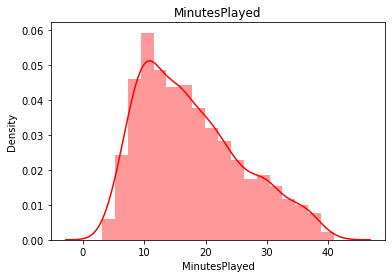

In [21]:
sns.distplot(df['MinutesPlayed'],color='r')
plt.title('MinutesPlayed')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MinutesPlayed')

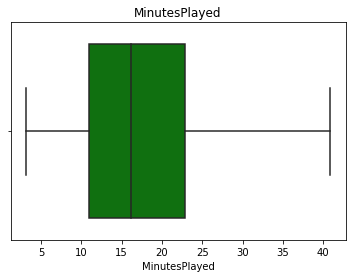

In [22]:
sns.boxplot(df['MinutesPlayed'],color='g')
plt.title('MinutesPlayed')

In [23]:
annova=ols('MinutesPlayed ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df       sum_sq     mean_sq          F  PR(>F)
Target       1.0   9334.50636  9334.50636  150.32044     0.0
Residual  1338.0  83086.30095    62.09738        NaN     NaN


# 3 PointsPerGame

In [24]:
df.PointsPerGame.value_counts()

3.7     26
4.1     26
4.5     25
3.3     24
2.9     24
        ..
14.6     1
18.5     1
15.9     1
23.7     1
15.6     1
Name: PointsPerGame, Length: 191, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PointsPerGame')

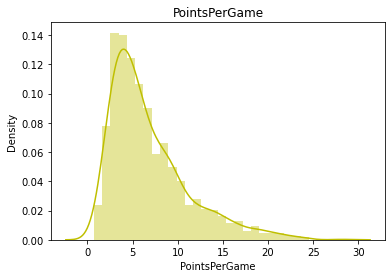

In [25]:
sns.distplot(df['PointsPerGame'],color='y')
plt.title('PointsPerGame')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PointsPerGame')

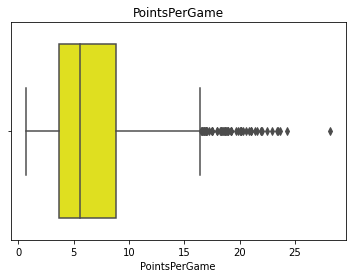

In [26]:
sns.boxplot(df['PointsPerGame'],color='yellow')
plt.title('PointsPerGame')

In [27]:
q1=df.PointsPerGame.quantile(0.25)
q3=df.PointsPerGame.quantile(0.75)
iqr=q3-q1
upper_bond_PointsPerGame=q3+(1.5*iqr)
lower_bond_PointsPerGame=q1-(1.5*iqr)
df.PointsPerGame=np.where(df.PointsPerGame>upper_bond_PointsPerGame,upper_bond_PointsPerGame, np.where(df.PointsPerGame <lower_bond_PointsPerGame, lower_bond_PointsPerGame, df.PointsPerGame))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PointsPerGame')

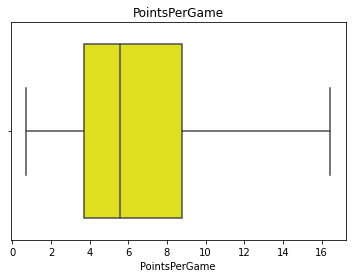

In [28]:
sns.boxplot(df['PointsPerGame'],color='yellow')
plt.title('PointsPerGame')

In [29]:
annova=ols('PointsPerGame ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df       sum_sq     mean_sq          F  PR(>F)
Target       1.0   2251.83178  2251.83178  159.49707     0.0
Residual  1338.0  18890.32121    14.11833        NaN     NaN


# 4 FieldGoalsMade

In [30]:
df.FieldGoalsMade.value_counts()

1.8    54
2.0    53
1.5    53
1.2    52
1.3    51
       ..
8.5     1
7.4     1
8.7     1
7.2     1
8.8     1
Name: FieldGoalsMade, Length: 87, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'FieldGoalsMade')

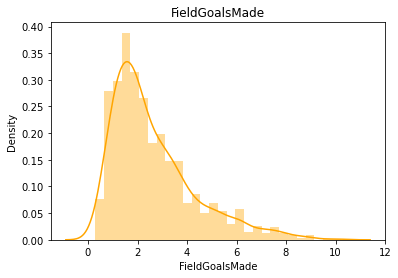

In [31]:
sns.distplot(df['FieldGoalsMade'],color='orange')
plt.title('FieldGoalsMade')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FieldGoalsMade')

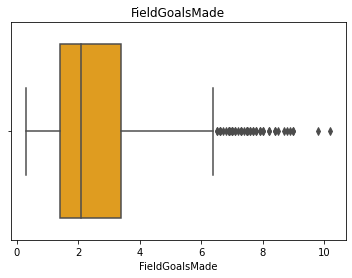

In [32]:
sns.boxplot(df['FieldGoalsMade'],color='orange')
plt.title('FieldGoalsMade')

In [33]:
q1=df.FieldGoalsMade.quantile(0.25)
q3=df.FieldGoalsMade.quantile(0.75)
iqr=q3-q1
upper_bond_FieldGoalsMade=q3+(1.5*iqr)
lower_bond_FieldGoalsMade=q1-(1.5*iqr)
df.FieldGoalsMade=np.where(df.FieldGoalsMade>upper_bond_FieldGoalsMade,upper_bond_FieldGoalsMade, np.where(df.FieldGoalsMade <lower_bond_FieldGoalsMade, lower_bond_FieldGoalsMade, df.FieldGoalsMade))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FieldGoalsMade')

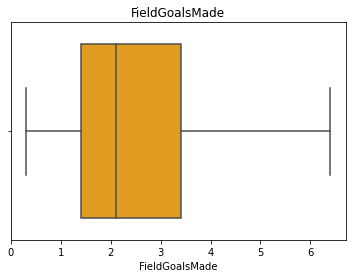

In [34]:
sns.boxplot(df['FieldGoalsMade'],color='orange')
plt.title('FieldGoalsMade')

In [35]:
annova=ols('FieldGoalsMade ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq    mean_sq          F  PR(>F)
Target       1.0   345.40900  345.40900  161.43304     0.0
Residual  1338.0  2862.84183    2.13964        NaN     NaN


# 5 FieldGoalsAttempt

In [36]:
df.FieldGoalsAttempt.value_counts()

3.1     29
3.2     28
3.6     28
4.4     27
3.4     27
        ..
16.3     1
16.2     1
16.7     1
15.7     1
12.6     1
Name: FieldGoalsAttempt, Length: 159, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'FieldGoalsAttempt')

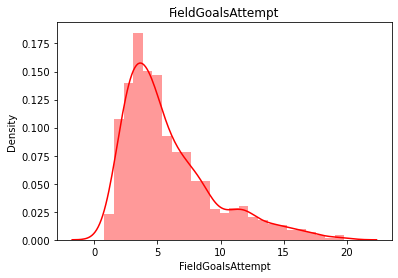

In [37]:
sns.distplot(df['FieldGoalsAttempt'],color='red')
plt.title('FieldGoalsAttempt')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FieldGoalsAttempt')

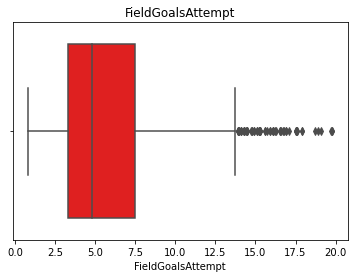

In [38]:
sns.boxplot(df['FieldGoalsAttempt'],color='red')
plt.title('FieldGoalsAttempt')

In [39]:
q1=df.FieldGoalsAttempt.quantile(0.25)
q3=df.FieldGoalsAttempt.quantile(0.75)
iqr=q3-q1
upper_bond_FieldGoalsAttempt=q3+(1.5*iqr)
lower_bond_FieldGoalsAttempt=q1-(1.5*iqr)
df.FieldGoalsAttempt=np.where(df.FieldGoalsAttempt>upper_bond_FieldGoalsAttempt,upper_bond_FieldGoalsAttempt, np.where(df.FieldGoalsAttempt <lower_bond_FieldGoalsAttempt, lower_bond_FieldGoalsAttempt, df.FieldGoalsAttempt))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FieldGoalsAttempt')

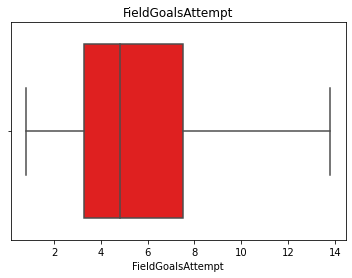

In [40]:
sns.boxplot(df['FieldGoalsAttempt'],color='red')
plt.title('FieldGoalsAttempt')

In [41]:
annova=ols('FieldGoalsAttempt ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df       sum_sq     mean_sq          F  PR(>F)
Target       1.0   1313.48086  1313.48086  130.81924     0.0
Residual  1338.0  13434.09003    10.04043        NaN     NaN


# 6 FieldGoalPercent

In [42]:
df.FieldGoalPercent.value_counts()

42.6    15
41.5    15
43.9    15
43.0    15
45.5    14
        ..
31.6     1
54.6     1
61.3     1
34.2     1
55.0     1
Name: FieldGoalPercent, Length: 284, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'FieldGoalsAttempt')

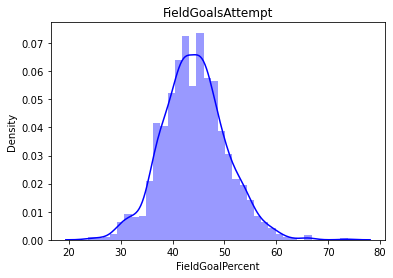

In [43]:
sns.distplot(df['FieldGoalPercent'],color='b')
plt.title('FieldGoalsAttempt')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FieldGoalsAttempt')

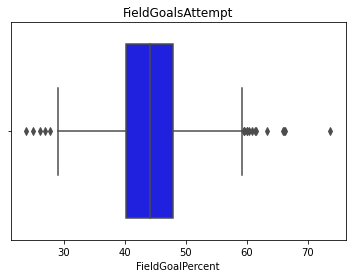

In [44]:
sns.boxplot(df['FieldGoalPercent'],color='b')
plt.title('FieldGoalsAttempt')

In [45]:
q1=df.FieldGoalPercent.quantile(0.25)
q3=df.FieldGoalPercent.quantile(0.75)
iqr=q3-q1
upper_bond_FieldGoalPercent=q3+(1.5*iqr)
lower_bond_FieldGoalPercent=q1-(1.5*iqr)
df.FieldGoalPercent=np.where(df.FieldGoalPercent>upper_bond_FieldGoalPercent,upper_bond_FieldGoalPercent, np.where(df.FieldGoalPercent <lower_bond_FieldGoalPercent, lower_bond_FieldGoalPercent, df.FieldGoalPercent))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FieldGoalsAttempt')

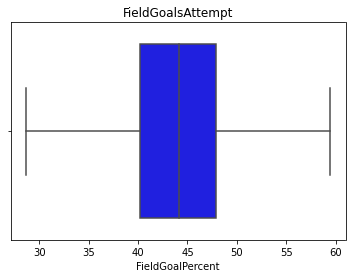

In [46]:
sns.boxplot(df['FieldGoalPercent'],color='b')
plt.title('FieldGoalsAttempt')

In [47]:
annova=ols('FieldGoalsAttempt ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df       sum_sq     mean_sq          F  PR(>F)
Target       1.0   1313.48086  1313.48086  130.81924     0.0
Residual  1338.0  13434.09003    10.04043        NaN     NaN


# 7 ThreePointMade

In [48]:
df.ThreePointMade.value_counts()

0.0    646
0.1    189
0.3     82
0.2     79
0.4     71
0.7     45
0.6     42
0.8     39
0.5     37
1.0     20
0.9     19
1.1     17
1.3     10
1.2      9
1.6      8
1.4      8
1.5      5
1.8      4
1.9      4
1.7      2
2.0      2
2.3      1
2.1      1
Name: ThreePointMade, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ThreePointMade')

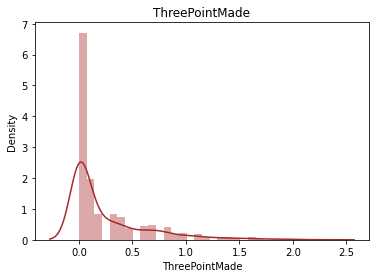

In [49]:
sns.distplot(df['ThreePointMade'],color='brown')
plt.title('ThreePointMade')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ThreePointMade')

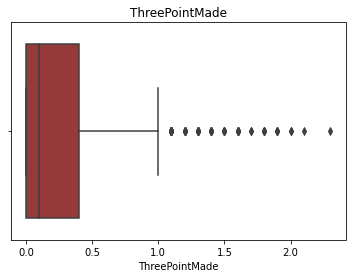

In [50]:
sns.boxplot(df['ThreePointMade'],color='brown')
plt.title('ThreePointMade')

In [51]:
q1=df.ThreePointMade.quantile(0.25)
q3=df.ThreePointMade.quantile(0.75)
iqr=q3-q1
upper_bond_ThreePointMade=q3+(1.5*iqr)
lower_bond_ThreePointMade=q1-(1.5*iqr)
df.ThreePointMade=np.where(df.ThreePointMade>upper_bond_ThreePointMade,upper_bond_ThreePointMade, np.where(df.ThreePointMade <lower_bond_ThreePointMade, lower_bond_ThreePointMade, df.ThreePointMade))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ThreePointMade')

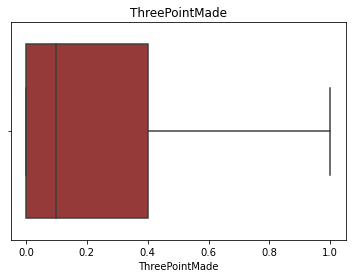

In [52]:
sns.boxplot(df['ThreePointMade'],color='brown')
plt.title('ThreePointMade')

In [53]:
annova=ols('ThreePointMade ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq  mean_sq        F   PR(>F)
Target       1.0    0.01663  0.01663  0.16677  0.68306
Residual  1338.0  133.39051  0.09969      NaN      NaN


In [54]:
df.drop(['ThreePointMade'],axis=1,inplace=True)

#  8 ThreePointAttempt

In [55]:
df.ThreePointAttempt.value_counts()

0.0    360
0.1    190
0.2     94
0.3     78
0.4     52
0.5     51
0.6     34
0.7     31
1.1     31
0.8     31
0.9     28
1.4     25
1.7     23
1.0     23
1.3     22
2.1     21
1.9     18
2.0     17
1.5     17
2.3     16
2.6     15
1.8     14
1.2     14
2.7     13
2.2     12
1.6     11
2.4     10
3.4     10
2.5      8
2.8      7
3.7      5
3.3      5
4.1      5
4.3      4
3.1      4
3.8      4
3.0      4
3.6      4
4.8      3
3.5      3
3.9      3
4.6      3
3.2      2
4.5      2
4.0      2
4.2      2
2.9      2
4.7      1
6.1      1
4.9      1
4.4      1
6.5      1
6.0      1
5.1      1
Name: ThreePointAttempt, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ThreePointAttempt')

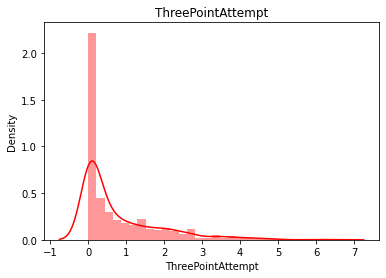

In [56]:
sns.distplot(df['ThreePointAttempt'],color='r')
plt.title('ThreePointAttempt')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ThreePointAttempt')

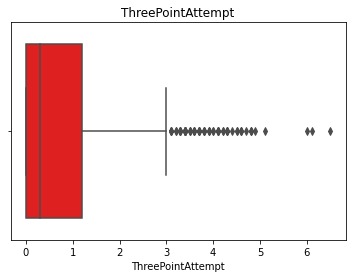

In [57]:
sns.boxplot(df['ThreePointAttempt'],color='r')
plt.title('ThreePointAttempt')

In [58]:
q1=df.ThreePointAttempt.quantile(0.25)
q3=df.ThreePointAttempt.quantile(0.75)
iqr=q3-q1
upper_bond_ThreePointAttempt=q3+(1.5*iqr)
lower_bond_ThreePointAttempt=q1-(1.5*iqr)
df.ThreePointAttempt=np.where(df.ThreePointAttempt>upper_bond_ThreePointAttempt,upper_bond_ThreePointAttempt, np.where(df.ThreePointAttempt <lower_bond_ThreePointAttempt, lower_bond_ThreePointAttempt, df.ThreePointAttempt))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ThreePointAttempt')

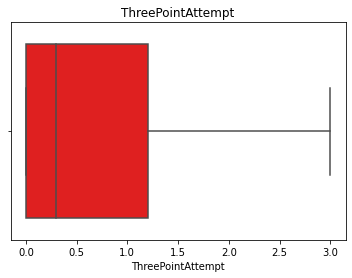

In [59]:
sns.boxplot(df['ThreePointAttempt'],color='r')
plt.title('ThreePointAttempt')

In [60]:
annova=ols('ThreePointAttempt ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq  mean_sq        F   PR(>F)
Target       1.0     0.00172  0.00172  0.00204  0.96396
Residual  1338.0  1124.58302  0.84050      NaN      NaN


In [61]:
df.drop(['ThreePointAttempt'],axis=1,inplace=True)

#  9 ThreePointPercent

In [62]:
df.ThreePointPercent.value_counts()

0.0     440
33.3     39
25.0     34
20.0     26
16.7     24
       ... 
26.8      1
37.6      1
37.9      1
13.8      1
23.4      1
Name: ThreePointPercent, Length: 255, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ThreePointPercent')

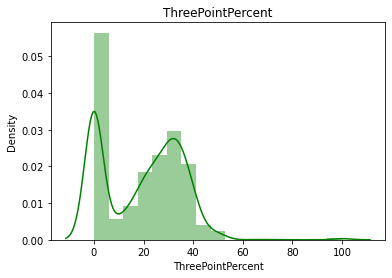

In [63]:
sns.distplot(df['ThreePointPercent'],color='g')
plt.title('ThreePointPercent')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ThreePointPercent')

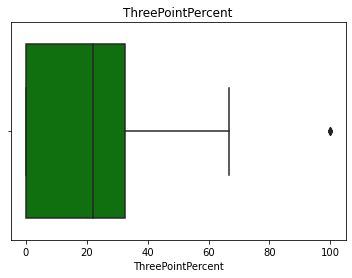

In [64]:
sns.boxplot(df['ThreePointPercent'],color='g')
plt.title('ThreePointPercent')

In [65]:
annova=ols('ThreePointPercent ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df        sum_sq    mean_sq        F   PR(>F)
Target       1.0       3.92806    3.92806  0.01542  0.90121
Residual  1338.0  340938.62418  254.81213      NaN      NaN


In [66]:
df.drop(['ThreePointPercent'],axis=1,inplace=True)

# 10 FreeThrowMade

In [67]:
df.FreeThrowMade.value_counts()

0.5    97
0.7    90
0.8    89
0.9    86
1.0    81
0.6    79
0.4    71
1.1    68
1.2    56
1.3    56
1.4    55
0.3    47
1.5    45
0.2    37
1.8    36
1.6    34
1.9    29
1.7    27
2.1    24
2.4    22
2.2    17
2.3    16
2.0    15
0.1    15
2.5    15
2.7    14
2.8    12
2.6    10
3.0     9
2.9     9
3.4     6
4.0     6
3.7     6
3.3     6
3.5     5
4.2     5
5.0     4
3.8     4
3.1     4
4.1     4
4.4     3
3.2     3
4.5     2
5.3     2
3.9     2
3.6     2
5.4     2
4.8     2
5.7     1
0.0     1
5.1     1
7.5     1
4.9     1
4.3     1
6.0     1
7.7     1
4.7     1
5.2     1
6.3     1
Name: FreeThrowMade, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'FreeThrowMade')

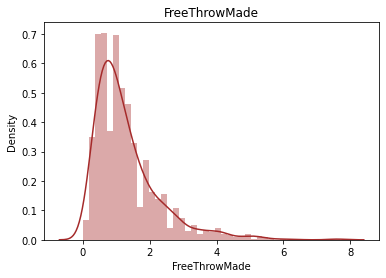

In [68]:
sns.distplot(df['FreeThrowMade'],color='brown')
plt.title('FreeThrowMade')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FreeThrowMade')

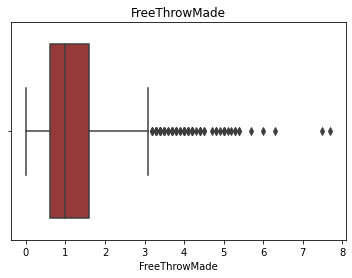

In [69]:
sns.boxplot(df['FreeThrowMade'],color='brown')
plt.title('FreeThrowMade')

In [70]:
q1=df.FreeThrowMade.quantile(0.25)
q3=df.FreeThrowMade.quantile(0.75)
iqr=q3-q1
upper_bond_FreeThrowMade=q3+(1.5*iqr)
lower_bond_FreeThrowMade=q1-(1.5*iqr)
df.FreeThrowMade=np.where(df.FreeThrowMade>upper_bond_FreeThrowMade,upper_bond_FreeThrowMade, np.where(df.FreeThrowMade <lower_bond_FreeThrowMade, lower_bond_FreeThrowMade, df.FreeThrowMade))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FreeThrowMade')

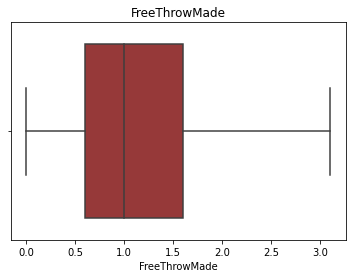

In [71]:
sns.boxplot(df['FreeThrowMade'],color='brown')
plt.title('FreeThrowMade')

In [72]:
annova=ols('FreeThrowMade ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq   mean_sq          F  PR(>F)
Target       1.0   87.36148  87.36148  153.29472     0.0
Residual  1338.0  762.51587   0.56989        NaN     NaN


# 11 FreeThrowAttempt

In [73]:
df.FreeThrowAttempt.value_counts()

0.8    73
1.0    67
1.2    66
1.3    65
0.7    64
       ..
6.1     1
8.5     1
9.1     1
5.3     1
8.1     1
Name: FreeThrowAttempt, Length: 76, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'FreeThrowAttempt')

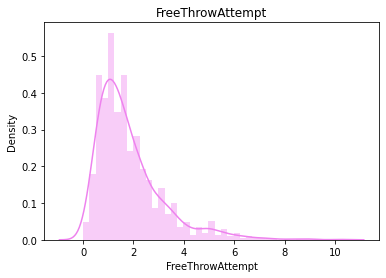

In [74]:
sns.distplot(df['FreeThrowAttempt'],color='violet')
plt.title('FreeThrowAttempt')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FreeThrowAttempt')

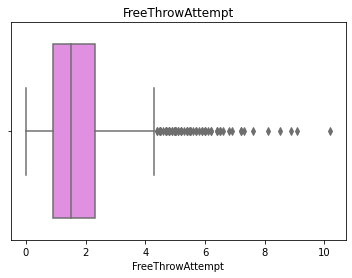

In [75]:
sns.boxplot(df['FreeThrowAttempt'],color='violet')
plt.title('FreeThrowAttempt')

In [76]:
q1=df.FreeThrowAttempt.quantile(0.25)
q3=df.FreeThrowAttempt.quantile(0.75)
iqr=q3-q1
upper_bond_FreeThrowAttempt=q3+(1.5*iqr)
lower_bond_FreeThrowAttempt=q1-(1.5*iqr)
df.FreeThrowAttempt=np.where(df.FreeThrowAttempt>upper_bond_FreeThrowAttempt,upper_bond_FreeThrowAttempt, np.where(df.FreeThrowAttempt <lower_bond_FreeThrowAttempt, lower_bond_FreeThrowAttempt, df.FreeThrowAttempt))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FreeThrowAttempt')

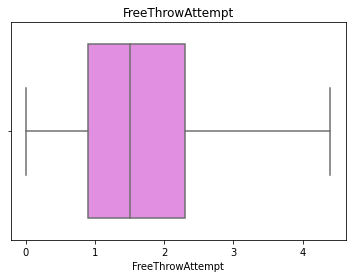

In [77]:
sns.boxplot(df['FreeThrowAttempt'],color='violet')
plt.title('FreeThrowAttempt')

In [78]:
annova=ols('FreeThrowAttempt ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq    mean_sq          F  PR(>F)
Target       1.0   161.02801  161.02801  147.68741     0.0
Residual  1338.0  1458.86151    1.09033        NaN     NaN


# 12 FreeThrowPercent     

In [79]:
df.FreeThrowPercent.value_counts()

66.7    29
75.0    21
50.0    18
72.7    14
80.0    13
        ..
85.2     1
58.0     1
38.4     1
64.1     1
60.2     1
Name: FreeThrowPercent, Length: 383, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'FreeThrowPercent')

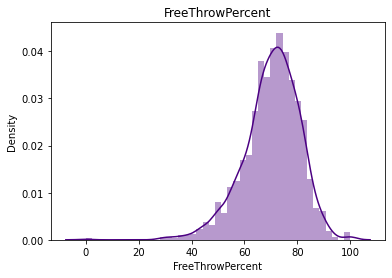

In [80]:
sns.distplot(df['FreeThrowPercent'],color='indigo')
plt.title('FreeThrowPercent')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FreeThrowPercent')

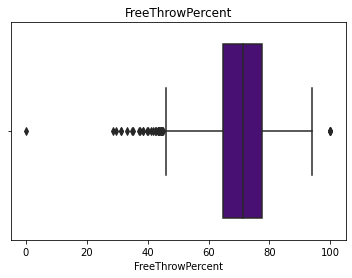

In [81]:
sns.boxplot(df['FreeThrowPercent'],color='indigo')
plt.title('FreeThrowPercent')

In [82]:
q1=df.FreeThrowPercent.quantile(0.25)
q3=df.FreeThrowPercent.quantile(0.75)
iqr=q3-q1
upper_bond_FreeThrowPercent=q3+(1.5*iqr)
lower_bond_FreeThrowPercent=q1-(1.5*iqr)
df.FreeThrowPercent=np.where(df.FreeThrowPercent>upper_bond_FreeThrowPercent,upper_bond_FreeThrowPercent, np.where(df.FreeThrowPercent <lower_bond_FreeThrowPercent, lower_bond_FreeThrowPercent, df.FreeThrowPercent))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FreeThrowPercent')

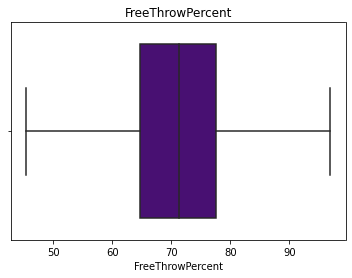

In [83]:
sns.boxplot(df['FreeThrowPercent'],color='indigo')
plt.title('FreeThrowPercent')

In [84]:
annova=ols('FreeThrowPercent ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df        sum_sq     mean_sq         F   PR(>F)
Target       1.0    1530.71577  1530.71577  15.35706  0.00009
Residual  1338.0  133365.19647    99.67503       NaN      NaN


#  13 OffensiveRebounds

In [85]:
df.OffensiveRebounds.value_counts()

0.3    111
0.5    109
0.4     98
0.6     96
0.7     92
0.2     92
0.8     79
1.0     64
1.1     58
0.9     51
1.4     50
1.2     46
0.1     43
1.5     39
1.3     38
1.6     37
1.7     27
2.1     26
2.0     22
1.9     19
2.3     19
2.2     17
2.4     17
1.8     16
2.5     10
2.7      8
2.8      7
2.6      6
3.3      5
0.0      4
3.1      4
3.0      4
3.4      4
3.7      4
4.2      3
2.9      2
3.9      2
3.6      2
4.3      2
3.5      2
4.0      2
3.2      1
5.3      1
3.8      1
Name: OffensiveRebounds, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'OffensiveRebounds')

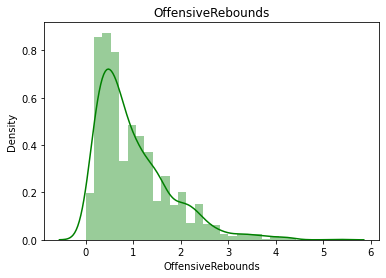

In [86]:
sns.distplot(df['OffensiveRebounds'],color='g')
plt.title('OffensiveRebounds')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'OffensiveRebounds')

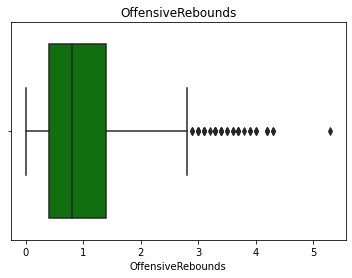

In [87]:
sns.boxplot(df['OffensiveRebounds'],color='g')
plt.title('OffensiveRebounds')

In [88]:
q1=df.OffensiveRebounds.quantile(0.25)
q3=df.OffensiveRebounds.quantile(0.75)
iqr=q3-q1
upper_bond_OffensiveRebounds=q3+(1.5*iqr)
lower_bond_OffensiveRebounds=q1-(1.5*iqr)
df.OffensiveRebounds=np.where(df.OffensiveRebounds>upper_bond_OffensiveRebounds,upper_bond_OffensiveRebounds, np.where(df.OffensiveRebounds <lower_bond_OffensiveRebounds, lower_bond_OffensiveRebounds, df.OffensiveRebounds))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'OffensiveRebounds')

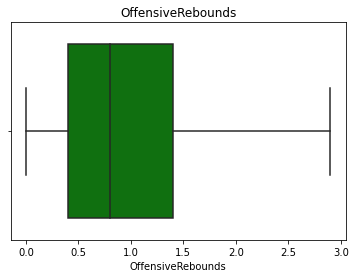

In [89]:
sns.boxplot(df['OffensiveRebounds'],color='g')
plt.title('OffensiveRebounds')

In [90]:
annova=ols('OffensiveRebounds ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq   mean_sq          F  PR(>F)
Target       1.0   61.73854  61.73854  132.45231     0.0
Residual  1338.0  623.66727   0.46612        NaN     NaN


#  14 DefensiveRebounds

In [91]:
df.DefensiveRebounds.value_counts()

0.9    60
1.1    59
0.7    59
0.8    59
1.3    57
       ..
8.8     1
7.7     1
7.1     1
9.6     1
8.3     1
Name: DefensiveRebounds, Length: 74, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DefensiveRebounds')

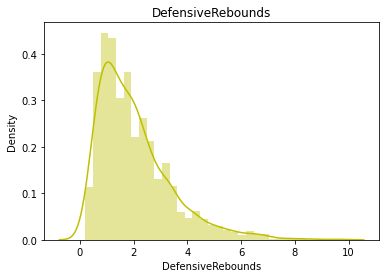

In [92]:
sns.distplot(df['DefensiveRebounds'],color='y')
plt.title('DefensiveRebounds')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'DefensiveRebounds')

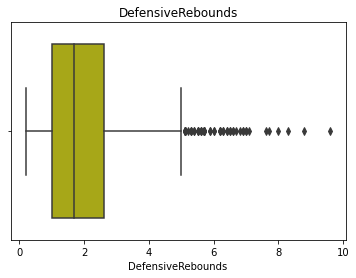

In [93]:
sns.boxplot(df['DefensiveRebounds'],color='y')
plt.title('DefensiveRebounds')

In [94]:
q1=df.DefensiveRebounds.quantile(0.25)
q3=df.DefensiveRebounds.quantile(0.75)
iqr=q3-q1
upper_bond_DefensiveRebounds=q3+(1.5*iqr)
lower_bond_DefensiveRebounds=q1-(1.5*iqr)
df.DefensiveRebounds=np.where(df.DefensiveRebounds>upper_bond_DefensiveRebounds,upper_bond_DefensiveRebounds, np.where(df.DefensiveRebounds <lower_bond_DefensiveRebounds, lower_bond_DefensiveRebounds, df.DefensiveRebounds))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'DefensiveRebounds')

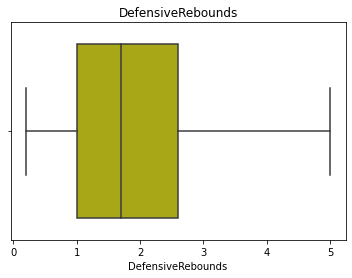

In [95]:
sns.boxplot(df['DefensiveRebounds'],color='y')
plt.title('DefensiveRebounds')

In [96]:
annova=ols('DefensiveRebounds ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq    mean_sq          F  PR(>F)
Target       1.0   174.75096  174.75096  129.78544     0.0
Residual  1338.0  1801.56397    1.34646        NaN     NaN


#  15 Rebounds

In [97]:
df.Rebounds.value_counts()

1.2     48
1.5     47
1.3     42
1.9     42
2.0     41
        ..
8.2      1
8.3      1
8.9      1
12.3     1
9.6      1
Name: Rebounds, Length: 101, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rebounds')

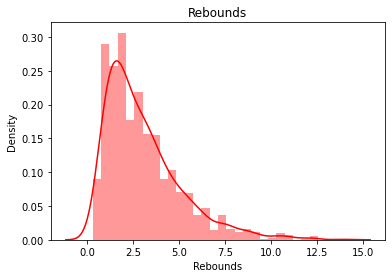

In [98]:
sns.distplot(df['Rebounds'],color='r')
plt.title('Rebounds')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rebounds')

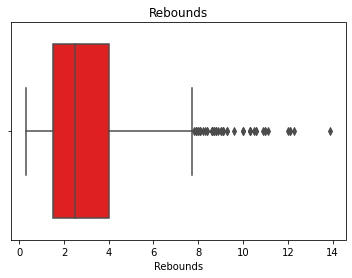

In [99]:
sns.boxplot(df['Rebounds'],color='r')
plt.title('Rebounds')

In [100]:
q1=df.Rebounds.quantile(0.25)
q3=df.Rebounds.quantile(0.75)
iqr=q3-q1
upper_bond_Rebounds=q3+(1.5*iqr)
lower_bond_Rebounds=q1-(1.5*iqr)
df.Rebounds=np.where(df.Rebounds>upper_bond_Rebounds,upper_bond_Rebounds, np.where(df.Rebounds <lower_bond_Rebounds, lower_bond_Rebounds, df.Rebounds))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rebounds')

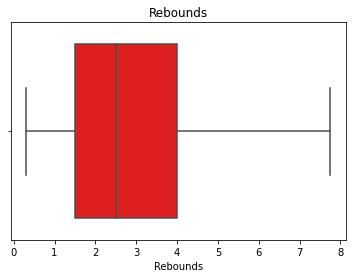

In [101]:
sns.boxplot(df['Rebounds'],color='r')
plt.title('Rebounds')

In [102]:
annova=ols('Rebounds ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq    mean_sq         F  PR(>F)
Target       1.0   449.81517  449.81517  143.3279     0.0
Residual  1338.0  4199.13148    3.13836       NaN     NaN


#  16 Assists

In [103]:
df.Assists.value_counts()

0.5     84
0.4     80
0.3     79
0.8     73
0.6     72
        ..
5.3      1
6.9      1
5.5      1
10.6     1
7.7      1
Name: Assists, Length: 77, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Assists')

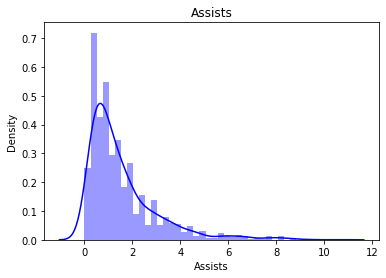

In [104]:
sns.distplot(df['Assists'],color='b')
plt.title('Assists')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assists')

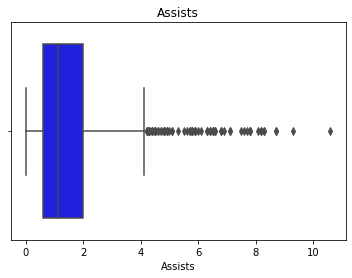

In [105]:
sns.boxplot(df['Assists'],color='b')
plt.title('Assists')

In [106]:
q1=df.Assists.quantile(0.25)
q3=df.Assists.quantile(0.75)
iqr=q3-q1
upper_bond_Assists=q3+(1.5*iqr)
lower_bond_Assists=q1-(1.5*iqr)
df.Assists=np.where(df.Assists>upper_bond_Assists,upper_bond_Assists, np.where(df.Assists <lower_bond_Assists, lower_bond_Assists, df.Assists))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assists')

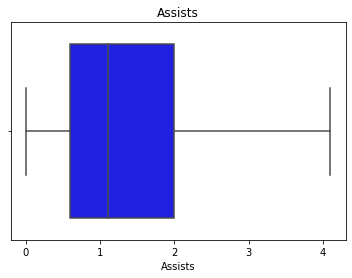

In [107]:
sns.boxplot(df['Assists'],color='b')
plt.title('Assists')

In [108]:
annova=ols('Assists ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq   mean_sq         F  PR(>F)
Target       1.0    52.79830  52.79830  42.11173     0.0
Residual  1338.0  1677.54029   1.25377       NaN     NaN


# 17 Steals

In [109]:
df.Steals.value_counts()

0.3    195
0.4    165
0.6    142
0.5    138
0.2    133
0.7    113
0.8     87
0.1     65
1.0     60
0.9     57
1.1     42
1.2     37
1.3     24
1.6     18
1.5     14
1.7      9
1.8      9
1.4      7
1.9      7
2.0      4
2.1      4
0.0      4
2.5      3
2.4      1
2.2      1
2.3      1
Name: Steals, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Steals')

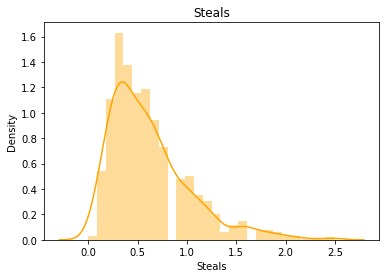

In [110]:
sns.distplot(df['Steals'],color='orange')
plt.title('Steals')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Steals')

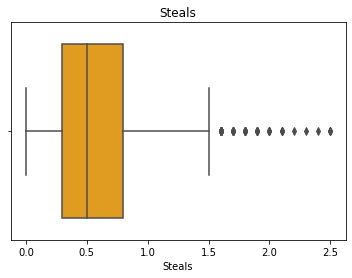

In [111]:
sns.boxplot(df['Steals'],color='orange')
plt.title('Steals')

In [112]:
q1=df.Steals.quantile(0.25)
q3=df.Steals.quantile(0.75)
iqr=q3-q1
upper_bond_Steals=q3+(1.5*iqr)
lower_bond_Steals=q1-(1.5*iqr)
df.Steals=np.where(df.Steals>upper_bond_Steals,upper_bond_Steals, np.where(df.Steals <lower_bond_Steals, lower_bond_Steals, df.Steals))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Steals')

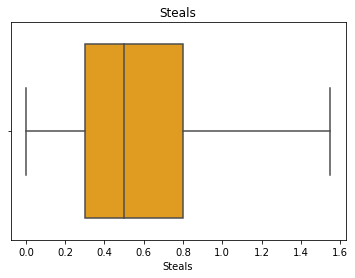

In [113]:
sns.boxplot(df['Steals'],color='orange')
plt.title('Steals')

In [114]:
annova=ols('Steals ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq   mean_sq         F  PR(>F)
Target       1.0   10.19330  10.19330  77.30251     0.0
Residual  1338.0  176.43206   0.13186       NaN     NaN


# 18 Blocks

In [115]:
df.Blocks.value_counts()

0.1    368
0.2    203
0.3    182
0.0    139
0.4     88
0.5     79
0.6     60
0.8     44
0.7     40
1.1     23
0.9     22
1.0     17
1.3     13
1.5     12
1.4     10
1.2      8
1.8      7
1.6      6
1.7      4
1.9      3
2.1      3
2.2      2
3.5      2
3.4      1
2.4      1
2.7      1
2.6      1
3.9      1
Name: Blocks, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Blocks')

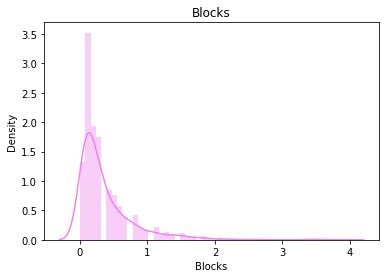

In [116]:
sns.distplot(df['Blocks'],color='violet')
plt.title('Blocks')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Blocks')

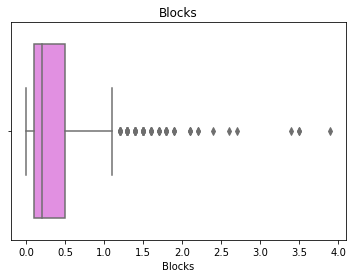

In [117]:
sns.boxplot(df['Blocks'],color='violet')
plt.title('Blocks')

In [118]:
q1=df.Blocks.quantile(0.25)
q3=df.Blocks.quantile(0.75)
iqr=q3-q1
upper_bond_Blocks=q3+(1.5*iqr)
lower_bond_Blocks=q1-(1.5*iqr)
df.Blocks=np.where(df.Blocks>upper_bond_Blocks,upper_bond_Blocks, np.where(df.Blocks <lower_bond_Blocks, lower_bond_Blocks, df.Blocks))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Blocks')

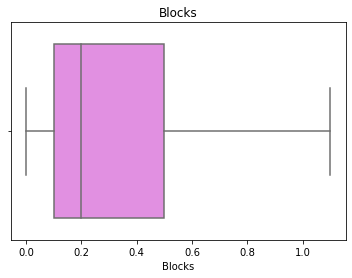

In [119]:
sns.boxplot(df['Blocks'],color='violet')
plt.title('Blocks')

In [120]:
annova=ols('Blocks ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq  mean_sq         F  PR(>F)
Target       1.0    6.94544  6.94544  73.53856     0.0
Residual  1338.0  126.36915  0.09445       NaN     NaN


#  19 Turnovers

In [121]:
df.Turnovers.value_counts()

0.8    114
0.9    105
0.6    105
0.7    103
0.5     83
1.0     81
1.1     78
1.2     67
0.4     64
1.3     62
1.4     62
1.6     43
1.7     37
0.3     37
1.5     35
1.8     34
2.0     31
1.9     29
2.2     17
2.1     17
2.5     16
2.3     14
2.9     13
3.0     10
2.4     10
0.1      9
3.4      8
2.7      8
0.2      7
2.8      6
3.1      6
2.6      5
3.5      4
3.2      4
3.3      4
3.6      3
3.8      3
4.2      2
3.9      2
4.0      1
4.4      1
Name: Turnovers, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Turnover')

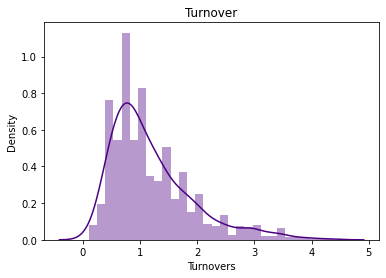

In [122]:
sns.distplot(df['Turnovers'],color='indigo')
plt.title('Turnover')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Turnover')

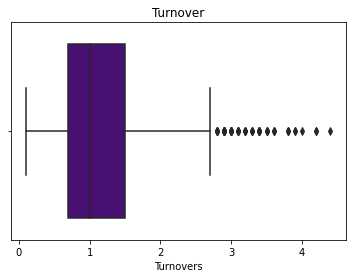

In [123]:
sns.boxplot(df['Turnovers'],color='indigo')
plt.title('Turnover')

In [124]:
q1=df.Turnovers.quantile(0.25)
q3=df.Turnovers.quantile(0.75)
iqr=q3-q1
upper_bond_Turnovers=q3+(1.5*iqr)
lower_bond_Turnovers=q1-(1.5*iqr)
df.Turnovers=np.where(df.Turnovers>upper_bond_Turnovers,upper_bond_Turnovers, np.where(df.Turnovers <lower_bond_Turnovers, lower_bond_Turnovers, df.Turnovers))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Turnovers')

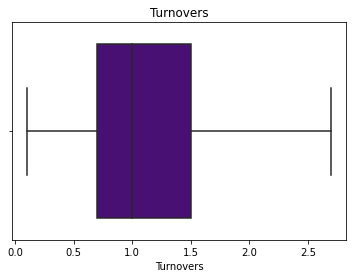

In [125]:
sns.boxplot(df['Turnovers'],color='indigo')
plt.title('Turnovers')

In [126]:
annova=ols('Turnovers ~ Target',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq   mean_sq          F  PR(>F)
Target       1.0   44.24801  44.24801  114.87543     0.0
Residual  1338.0  515.37420   0.38518        NaN     NaN


In [127]:
df.Target.value_counts()

1    831
0    509
Name: Target, dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   FreeThrowMade      1340 non-null   float64
 8   FreeThrowAttempt   1340 non-null   float64
 9   FreeThrowPercent   1340 non-null   float64
 10  OffensiveRebounds  1340 non-null   float64
 11  DefensiveRebounds  1340 non-null   float64
 12  Rebounds           1340 non-null   float64
 13  Assists            1340 non-null   float64
 14  Steals             1340 non-null   float64
 15  Blocks             1340 non-null   float64
 16  Turnovers          1340 

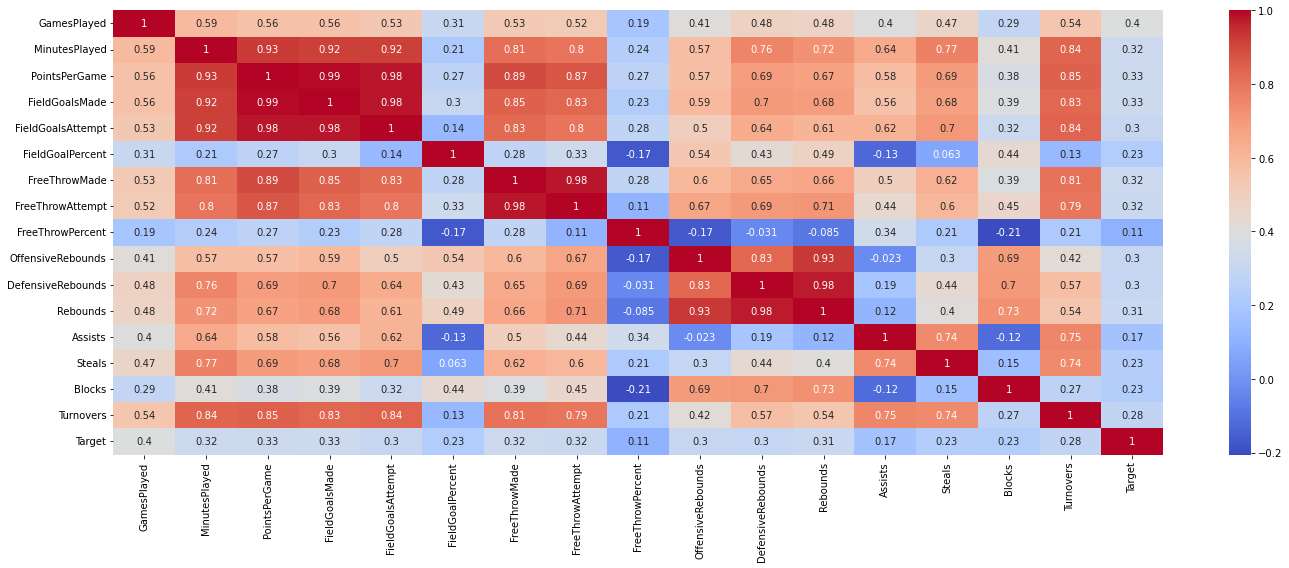

In [129]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.tight_layout()

In [130]:
x=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
#x=df.iloc[:,[:-1]]

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=x.columns

In [132]:
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [133]:
print(vif_data)

              feature          VIF
0         GamesPlayed    22.184588
1       MinutesPlayed    95.988685
2       PointsPerGame   801.565629
3      FieldGoalsMade   603.952195
4   FieldGoalsAttempt   286.450500
5    FieldGoalPercent    93.728653
6       FreeThrowMade   221.461491
7    FreeThrowAttempt   202.667176
8    FreeThrowPercent    89.996221
9   OffensiveRebounds   230.928037
10  DefensiveRebounds   846.598201
11           Rebounds  1816.487507
12            Assists    14.370889
13             Steals    12.619931
14             Blocks     5.140001
15          Turnovers    31.533003


In [134]:
df.drop(['Name'],axis=1,inplace=True)

# MODELS

# SPLITTING THE MODELS

In [135]:
x=df.loc[:,df.columns!='Target']
y=df.loc[:,df.columns=='Target']

In [136]:
y

,Target
0,0
1,0
2,0
3,1
4,1
...,...
1335,0
1336,1
1337,0
1338,1


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
log=LogisticRegression(solver='liblinear',random_state=0)
log.fit(x_train,y_train)
log.intercept_
log.coef_

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.30375366e-02, -4.97045846e-02,  3.57774796e-01,
         3.39583568e-01, -3.50955349e-01, -2.80944348e-02,
         4.63176033e-01, -4.91670385e-01,  5.91837787e-04,
         6.00283441e-01, -5.35456346e-01,  3.68053700e-01,
         2.74793605e-01, -8.01933059e-03,  4.98263023e-01,
        -3.09143756e-01]])

In [141]:
# predictions
y_pred=log.predict(x_test)
print(len(y_pred))

268


# confusion matrix

In [142]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 54  37]
 [ 36 141]]


# accuracy score

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7276119402985075

# classification report

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60        91
           1       0.79      0.80      0.79       177

    accuracy                           0.73       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.73      0.73      0.73       268



# ROC curve and AUC curve

In [146]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [147]:
y_pred_prob=log.predict_proba(x)
fpr,tpr,thresholds=roc_curve(df['Target'],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.7631194456462378


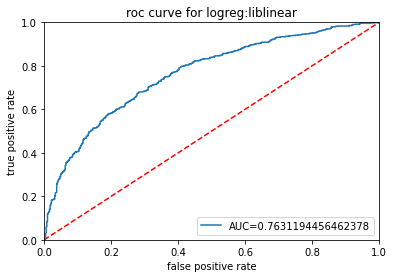

In [148]:
# roc curve
plt.title('roc curve for logreg:liblinear')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.legend(loc=4)
plt.show()

# SMOTE

In [149]:
df.Target.value_counts()

1    831
0    509
Name: Target, dtype: int64

In [150]:
notarget=df[df.Target==0]
target=df[df.Target==1]

In [151]:
from sklearn.utils import resample

In [152]:
target_oversample=resample(target,
                        replace=True,
                        n_samples=len(notarget),
                        random_state=27)

In [153]:
#combine majority and oversampled minority
df=pd.concat([notarget,target_oversample])
df.Target.value_counts()

0    509
1    509
Name: Target, dtype: int64

In [154]:
x=df.loc[:,df.columns!='Target']
y=df.loc[:,df.columns=='Target']

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
log1=LogisticRegression(solver='liblinear',random_state=0)
log1.fit(x_train,y_train)
log1.intercept_
log1.coef_

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.30375366e-02, -4.97045846e-02,  3.57774796e-01,
         3.39583568e-01, -3.50955349e-01, -2.80944348e-02,
         4.63176033e-01, -4.91670385e-01,  5.91837787e-04,
         6.00283441e-01, -5.35456346e-01,  3.68053700e-01,
         2.74793605e-01, -8.01933059e-03,  4.98263023e-01,
        -3.09143756e-01]])

In [157]:
# predictions
y_pred2=log1.predict(x_test)
len(y_pred2)

268

In [158]:
from sklearn import metrics
cm1=metrics.confusion_matrix(y_test, y_pred2)
print(cm1)

[[ 54  37]
 [ 36 141]]


# accuracy score

In [159]:
log1.score(x_test,y_test)

0.7276119402985075

# classification report

In [160]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60        91
           1       0.79      0.80      0.79       177

    accuracy                           0.73       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.73      0.73      0.73       268



# roc curve and auc 

In [161]:
y_pred_prob=log1.predict_proba(x)
fpr,tpr,thresholds=roc_curve(df['Target'],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.7534574129326349


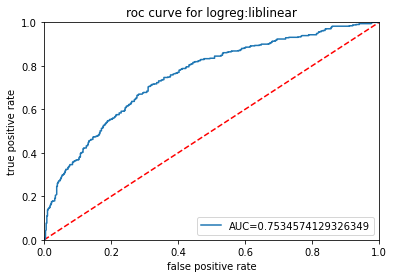

In [162]:
plt.title('roc curve for logreg:liblinear')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.legend(loc=4)
plt.show()


# standard scaling

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

# DESCISON TREE CLASSIFIER 

In [165]:
df.shape

(1018, 17)

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [169]:
regr=DecisionTreeClassifier()

In [170]:
regr.fit(x_train,y_train)

DecisionTreeClassifier()

In [171]:
# predict/estimate train and xtrain 
test_train=regr.predict(x_train)

In [172]:
# see train 
from sklearn import tree 

[Text(0.5537652824620574, 0.96875, 'X[0] <= 0.111\ngini = 0.5\nsamples = 814\nvalue = [405, 409]'),
 Text(0.3044108347386172, 0.90625, 'X[9] <= -0.271\ngini = 0.442\nsamples = 412\nvalue = [276, 136]'),
 Text(0.16320615514333894, 0.84375, 'X[4] <= 0.654\ngini = 0.376\nsamples = 271\nvalue = [203, 68]'),
 Text(0.11667369308600337, 0.78125, 'X[2] <= -1.104\ngini = 0.363\nsamples = 264\nvalue = [201, 63]'),
 Text(0.04384485666104553, 0.71875, 'X[2] <= -1.273\ngini = 0.488\nsamples = 38\nvalue = [22, 16]'),
 Text(0.03709949409780776, 0.65625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.050590219224283306, 0.65625, 'X[5] <= -0.925\ngini = 0.499\nsamples = 31\nvalue = [15, 16]'),
 Text(0.03372681281618887, 0.59375, 'X[12] <= -0.116\ngini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.026981450252951095, 0.53125, 'X[3] <= -1.128\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.013490725126475547, 0.46875, 'X[1] <= -0.927\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(

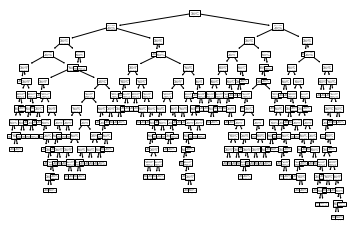

In [173]:
tree.plot_tree(regr.fit(x_train,y_train))

# TRAIN DATA 

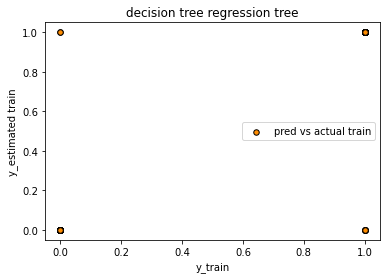

In [174]:
plt.figure()
plt.scatter(y_train,test_train,s=30,edgecolor='black',
           c='darkorange',label='pred vs actual train')
plt.xlabel('y_train')
plt.ylabel('y_estimated train')
plt.title('decision tree regression tree')
plt.legend()
plt.show()

# RANDOM SEARCH(RANDOM FOREST)

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [178]:
model_params={
    'n_estimators':[50,150,250],
    'max_features':['sqrt',0.25,0.5,0,75,1.0],
    'min_samples_split':[2,4,6]
}

In [179]:
#model building with grid search
# define rf 
rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\AppData\Local\Temp\ipykernel_2488\2975544097.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)


RandomForestClassifier(random_state=1)

In [180]:
#set up grid search
clf=RandomizedSearchCV(rf_model,model_params,cv=5)

In [181]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(rf_model,model_params,cv = 10,random_state = 8)
search.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680:

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_features': ['sqrt', 0.25, 0.5, 0,
                                                         75, 1.0],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 150, 250]},
                   random_state=8)

In [182]:
est=search.best_estimator_

In [183]:
rf_model1=est.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\AppData\Local\Temp\ipykernel_2488\2785416181.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model1=est.fit(x_train,y_train)


In [184]:
y_pred=rf_model1.predict(x_test)

In [185]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [186]:
accuracy_score(y_pred,y_test)

0.7205882352941176

In [187]:
print(confusion_matrix(y_pred,y_test))

[[74 27]
 [30 73]]


In [188]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       101
           1       0.73      0.71      0.72       103

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204



In [189]:
roc_auc_score(y_pred,y_test)

0.7207055657022013

In [190]:
y_pred_prob = rf_model1.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.7949038461538461

# SVM(Support vector machine)

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [192]:
from sklearn import svm

In [193]:
svc = svm.SVC(class_weight='balanced', probability=True)
model_svc = svc.fit(x_train,y_train)
model_svc.get_params()

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [194]:
y_pred = model_svc.predict(x_test)
len(y_pred)

204

In [195]:
accuracy_score(y_test,y_pred)

0.696078431372549

In [196]:
print(confusion_matrix(y_test,y_pred))

[[73 31]
 [31 69]]


In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       104
           1       0.69      0.69      0.69       100

    accuracy                           0.70       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.70      0.70      0.70       204



In [198]:
roc_auc_score(y_test,y_pred)

0.6959615384615383

# NAVIEBAYES

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_tarin,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=8)

In [201]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model=gnb.fit(x_train,y_train)
model

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [202]:
y_pred=model.predict(x_test)


In [203]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [204]:
confusion_matrix(y_pred,y_test)

array([[83, 50],
       [21, 50]], dtype=int64)

In [205]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.80      0.62      0.70       133
           1       0.50      0.70      0.58        71

    accuracy                           0.65       204
   macro avg       0.65      0.66      0.64       204
weighted avg       0.69      0.65      0.66       204



In [206]:
print(accuracy_score(y_test,y_pred)*100)

65.19607843137256
